In [1]:
%load_ext autoreload

In [2]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [3]:
%matplotlib inline

#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('pdf', 'svg')

import pandas as pd
import numpy as np
from IPython.display import HTML, display
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, proj3d
from itertools import product, combinations

%config InlineBackend.figure_format = 'svg'

## Sensitivity Plots

In [4]:
%autoreload

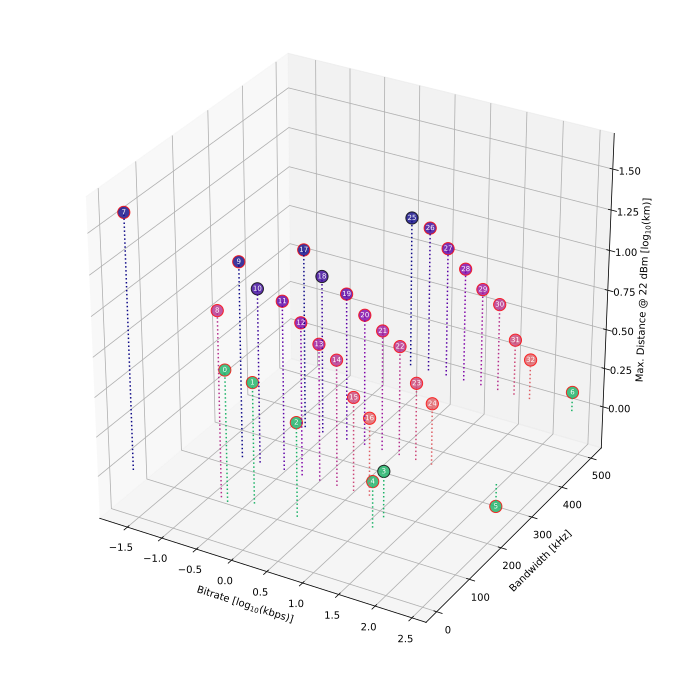

In [5]:
from flora_tools.radio_configuration import RadioConfiguration
from flora_tools.radio_math import RadioMath, SENSITIVITIES

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

def is_pareto_optimal(item):
    competitors = df[(df.bitrate >= item.bitrate) & (df.bandwidth <= item.bandwidth) & (df.distance >= item.distance)]
    if len(competitors) > 1:
        return (0.0,0.0,0.0)
    else:
        return (1.0,0.0,0.0)
    
def get_color(item):
    if not np.isnan(item.sf):
        return RadioConfiguration(int(12 - item.sf)).color
    else:
        return (0.1,0.7,0.4)

df = pd.DataFrame(SENSITIVITIES)

df.loc[:,'distance'] = df.apply(RadioMath.get_theoretical_max_distance, axis=1)
df.loc[:,'bitrate'] = df.apply(RadioMath.get_bitrate, axis=1)

colors = df.apply(get_color, axis=1)
edgecolors = df.apply(is_pareto_optimal, axis=1)

fig = plt.figure(figsize=[12,12])
ax = fig.add_subplot(111, projection='3d')

for index, row in df.iterrows():
    ax.plot([np.log10(row.bitrate / 1000), np.log10(row.bitrate / 1000)], [row.bandwidth / 1000, row.bandwidth / 1000], [0, np.log10(row.distance / 1000)], ':', c=colors[index])

ax.scatter(np.log10(df.bitrate / 1000), df.bandwidth / 1000, np.log10(df.distance / 1000), c=colors, edgecolors=edgecolors, s=150, alpha=0.8)

for index, row in df.iterrows():
    ax.text(np.log10(row.bitrate / 1000), row.bandwidth / 1000, np.log10(row.distance / 1000), str(index), None, color='w', fontsize=7, horizontalalignment="center", verticalalignment="center")


ax = plt.gca()
plt.xlabel("Bitrate [$\log_{10}$(kbps)]")
plt.ylabel("Bandwidth [kHz]")
ax.set_zlabel("Max. Distance @ 22 dBm [$\log_{10}$(km)]")

plt.show()

df.style
    
    

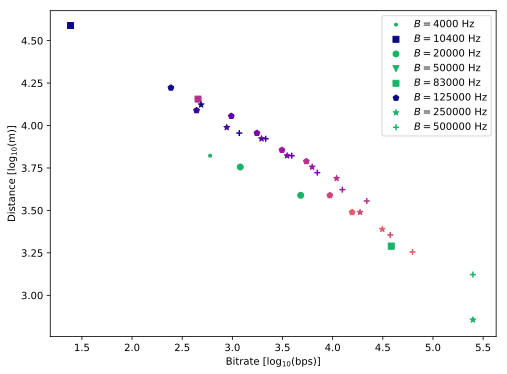

In [6]:
import itertools
marker = itertools.cycle(('.',',','o','v','s','p','*','+','x'))

plt.figure(figsize=[8,6])

bandwidths = df.sort_values(by=['bandwidth']).bandwidth.unique()

for bandwidth in bandwidths:
    colors = df[df.bandwidth == bandwidth].apply(get_color, axis=1)
    plt.scatter(np.log10(df[df.bandwidth == bandwidth].bitrate),
                np.log10(df[df.bandwidth == bandwidth].distance),
                label="$B = {}$ Hz".format(bandwidth),
                color=colors,
                marker = next(marker)
)
    
plt.ylabel("Distance [$\log_{10}(\mathrm{m})$]")
plt.xlabel("Bitrate [$\log_{10}(\mathrm{bps})$]")
plt.legend()

plt.show()

# Energy Plots

In [7]:
%autoreload

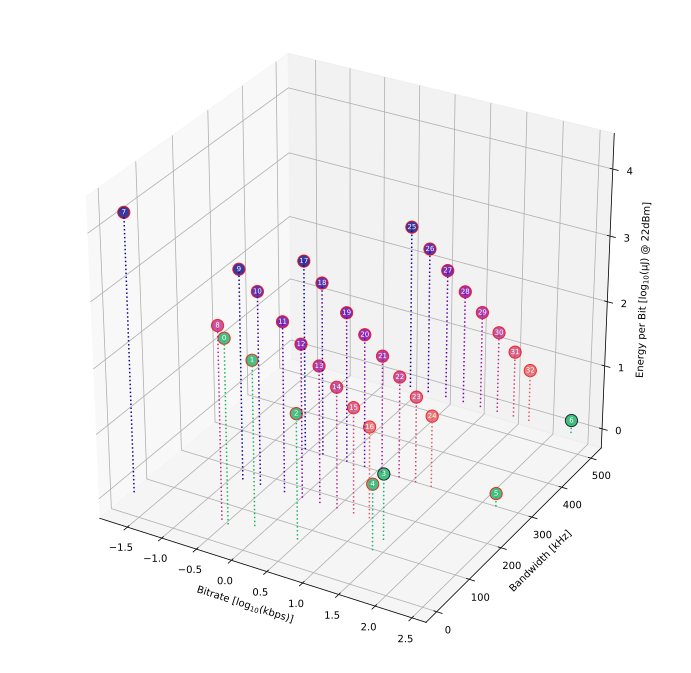

In [8]:
from flora_tools.radio_configuration import RadioConfiguration
from flora_tools.radio_math import RadioMath, SENSITIVITIES

from mpl_toolkits.mplot3d import Axes3D

def is_pareto_optimal(item):
    competitors = df[(df.bitrate >= item.bitrate) & (df.bandwidth <= item.bandwidth) & (df.energy >= item.energy)]
    if len(competitors) > 1:
        return (0.0,0.0,0.0)
    else:
        return (1.0,0.0,0.0)
    
def get_color(item):
    if not np.isnan(item.sf):
        return RadioConfiguration(int(12 - item.sf)).color
    else:
        return (0.1,0.7,0.4)

df = pd.DataFrame(SENSITIVITIES)

df.loc[:,'energy'] = df.apply(RadioMath.get_energy_per_bit, axis=1)
df.loc[:,'bitrate'] = df.apply(RadioMath.get_bitrate, axis=1)

colors = df.apply(get_color, axis=1)
edgecolors = df.apply(is_pareto_optimal, axis=1)

fig = plt.figure(figsize=[12,12])
ax = fig.add_subplot(111, projection='3d')

for index, row in df.iterrows():
    ax.plot([np.log10(row.bitrate / 1000), np.log10(row.bitrate / 1000)], [row.bandwidth / 1000, row.bandwidth / 1000], [0, np.log10(row.energy * 1000)], ':', c=colors[index])
    
ax.scatter(np.log10(df.bitrate / 1000), df.bandwidth / 1000, np.log10(df.energy * 1000), c=colors, edgecolors=edgecolors, s=150, alpha=0.8)

for index, row in df.iterrows():
    ax.text(np.log10(row.bitrate / 1000), row.bandwidth / 1000, np.log10(row.energy * 1000), str(index), None, color='w', fontsize=7, horizontalalignment="center", verticalalignment="center")

ax = plt.gca()
plt.xlabel("Bitrate [$\log_{10}$(kbps)]")
plt.ylabel("Bandwidth [kHz]")
ax.set_zlabel("Energy per Bit [$\log_{10}$(µJ) @ 22dBm]")

plt.show()

df.style
    
    

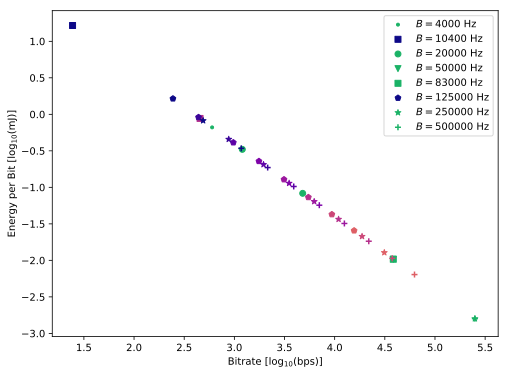

In [9]:
import itertools
marker = itertools.cycle(('.',',','o','v','s','p','*','+','x'))

plt.figure(figsize=[8,6])

bandwidths = df.sort_values(by=['bandwidth']).bandwidth.unique()

for bandwidth in bandwidths:
    colors = df[df.bandwidth == bandwidth].apply(get_color, axis=1)
    plt.scatter(np.log10(df[df.bandwidth == bandwidth].bitrate),
                np.log10(df[df.bandwidth == bandwidth].energy),
                label="$B = {}$ Hz".format(bandwidth),
                color=colors,
                marker = next(marker)
)
    
plt.ylabel("Energy per Bit [$\log_{10}(\mathrm{mJ})$]")
plt.xlabel("Bitrate [$\log_{10}(\mathrm{bps})$]")
plt.legend()

plt.show()

# Power Consumption and Efficiency



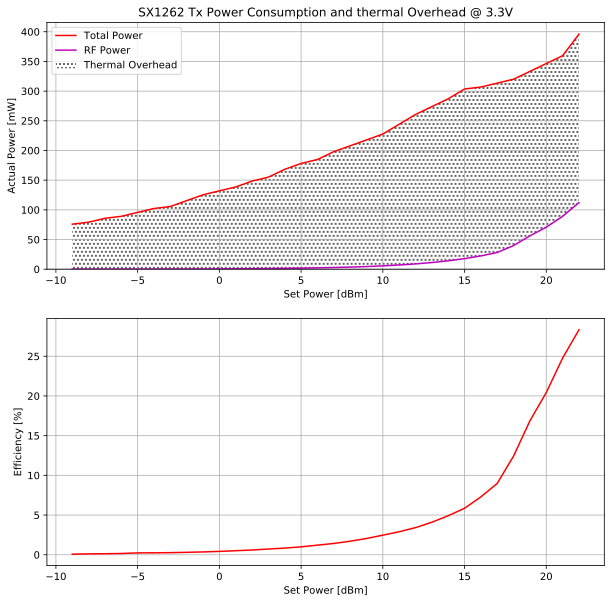

In [10]:
from flora_tools.radio_configuration import TX_CURRENT_LOOKUP_TABLE, TX_ACTUAL_POWER_LOOKUP_TABLE

import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format = 'svg'

VOLTAGE = 3.3


def power_consumption(power):  # mW
    current = np.interp(power, TX_CURRENT_LOOKUP_TABLE[0], TX_CURRENT_LOOKUP_TABLE[1])
    return VOLTAGE * current
    
def actual_power(power):  # dBm
    return np.interp(power, TX_ACTUAL_POWER_LOOKUP_TABLE[0], TX_ACTUAL_POWER_LOOKUP_TABLE[1]) - 1.5

POWERS = np.array(range(-9, 23))

plt.figure(figsize=[10,10])

plt.subplot(2, 1, 1)

plt.plot(POWERS, power_consumption(POWERS), c='r', label='Total Power')
plt.plot(POWERS, np.power(10, actual_power(POWERS)/10), c='m', label='RF Power')
 
ax = plt.gca()
ax.grid(True)
    
plt.ylim(ymin=0)
    
ax.fill_between(POWERS, power_consumption(POWERS), np.power(10, actual_power(POWERS)/10), hatch='...', facecolor="none", label='Thermal Overhead', linewidth=0)

plt.legend()
    
plt.title("SX1262 Tx Power Consumption and thermal Overhead @ 3.3V")
plt.xlabel("Set Power [dBm]")
plt.ylabel("Actual Power [mW]")
    


plt.subplot(2, 1, 2)

plt.plot(POWERS, 100 * np.power(10, actual_power(POWERS)/10) / power_consumption(POWERS), c='r', label='Efficiency')
plt.xlabel("Set Power [dBm]")
plt.ylabel("Efficiency [%]")
ax = plt.gca()
ax.grid(True)


plt.show()

## Hop-Example

Two nodes require 22 dBm to communicate with each other. A new intermediate node appears perfectly in between the nodes, relaying the nodes' messages to each other. The required Tx power regarding cubic path loss gets to be


In [11]:
new_power_level = 22 + np.log10(1/(np.power(2,3))) * 10
new_power_level

12.969100130080564

Keep in mind that we now have to send each message twice.
This results in the original scenario with a over total power (mW) of

In [12]:
old_power = power_consumption(22)
old_power

396.0

In [13]:
new_power = power_consumption(new_power_level) * 2
new_power

546.9842434341268

We need more power even under the pessimistic assumption of cubic decay for multi-hopping! We need twice the time! We have more radio-MCU communication. Our only benefit is having used less space (Space Division Multiple Access, SDMA). 

### Square Decay

Now we look at a square decay:

In [14]:
new_power_level = 22 + np.log10(1/(np.power(2,2))) * 10
new_power_level

15.979400086720375

In [15]:
old_power = power_consumption(22)
old_power

396.0

In [16]:
new_power = power_consumption(new_power_level) * 2
new_power

613.6640405723545

### N-nodes

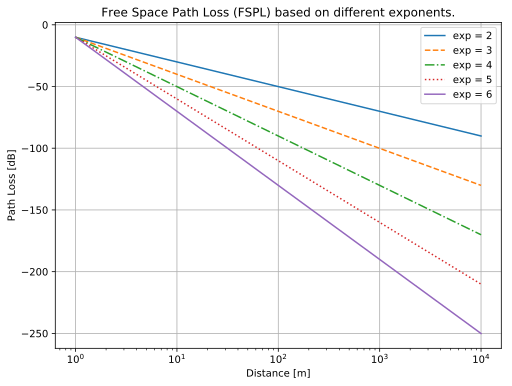

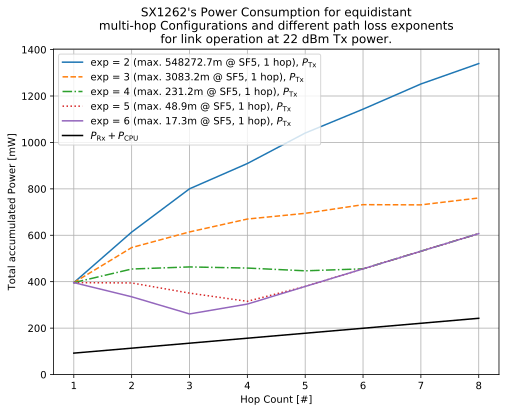

In [17]:
from flora_tools.radio_math import RF_SWITCH_INSERTION_LOSS


plt.figure(figsize=[8,6])


distances = np.linspace(1, 10000, num=1000)

def path_loss(distance, exp):
    WAVELENGTH = 1.0 / 868E6 * 300E6
    return - np.log10(np.power(distance, exp) * np.sqrt(4 * np.pi) / WAVELENGTH) * 10


plt.semilogx(distances, path_loss(distances, 2), "-", label=r'exp = 2')
plt.semilogx(distances, path_loss(distances, 3), "--", label=r'exp = 3')
plt.semilogx(distances, path_loss(distances, 4), "-.", label=r'exp = 4')
plt.semilogx(distances, path_loss(distances, 5), ":", label=r'exp = 5')
plt.semilogx(distances, path_loss(distances, 6), "-", label=r'exp = 6')

ax = plt.gca()
ax.grid(True)

plt.title("Free Space Path Loss (FSPL) based on different exponents.")

plt.xlabel("Distance [m]")
plt.ylabel("Path Loss [dB]")

plt.legend()

plt.show()





def required_power(count, decay, power=22):
    return power_consumption(power + np.log10(1/(np.power(count, decay))) * 10) * count

def rx_proc_power(count):
    return count * 6.5 * VOLTAGE

def distance(decay):
    SENSITIVITY = -115
    MAX_POWER = 22  # dBm
    WAVELENGTH = 1.0 / 868E6 * 300E6
    link_budget = -(SENSITIVITY - MAX_POWER + RF_SWITCH_INSERTION_LOSS)
    distance = np.power(10, link_budget / 10.0 / decay) / np.sqrt(4 * np.pi) * WAVELENGTH
    
    return distance 

HOP_COUNTS = np.array(range(1, 9))

plt.figure(figsize=[8,6])

plt.plot(HOP_COUNTS, required_power(HOP_COUNTS, 2), "-", label=r'exp = 2 (max. {:.1f}m @ SF5, 1 hop)'.format(distance(2)) + r', $P_\mathrm{Tx}$')
plt.plot(HOP_COUNTS, required_power(HOP_COUNTS, 3), "--", label=r'exp = 3 (max. {:.1f}m @ SF5, 1 hop)'.format(distance(3)) + r', $P_\mathrm{Tx}$')
plt.plot(HOP_COUNTS, required_power(HOP_COUNTS, 4), "-.", label=r'exp = 4 (max. {:.1f}m @ SF5, 1 hop)'.format(distance(4)) + r', $P_\mathrm{Tx}$')
plt.plot(HOP_COUNTS, required_power(HOP_COUNTS, 5), ":", label=r'exp = 5 (max. {:.1f}m @ SF5, 1 hop)'.format(distance(5)) + r', $P_\mathrm{Tx}$')
plt.plot(HOP_COUNTS, required_power(HOP_COUNTS, 6), "-", label=r'exp = 6 (max. {:.1f}m @ SF5, 1 hop)'.format(distance(6)) + r', $P_\mathrm{Tx}$')

plt.plot(np.array([1, 8]), rx_proc_power(np.array([1, 8]) + 1.0 * VOLTAGE), "k", label=r'$P_\mathrm{Rx} + P_\mathrm{CPU}$')
 
ax = plt.gca()
ax.grid(True)

plt.legend()
    
plt.ylim(ymin=0)

plt.title("SX1262's Power Consumption for equidistant\nmulti-hop Configurations and different path loss exponents\nfor link operation at 22 dBm Tx power.")
plt.xlabel("Hop Count [#]")
plt.ylabel("Total accumulated Power [mW]")


plt.show()



\begin{align}
P_\mathrm{Tx_{required}}(n, \mathit{exp}) & = \frac{P_\mathrm{Tx_{required}}(1, \mathit{exp})}{n^\mathit{exp}}
\end{align}

\begin{align}
P_\mathrm{total}(n, \mathit{exp}) & = \mathrm{Hop\ Count} \cdot (P_\mathrm{Tx_{consumption}}(P_\mathrm{Tx_{required}}(n, \mathit{exp})) + P_\mathrm{Rx} + P_\mathrm{CPU}) + P_\mathrm{CPU}
\end{align}

Assuming we set $P_\mathrm{Tx_{required}}(1, \mathit{exp}) = 22\ \mathrm{dBm}$

and $P_\mathrm{Rx} = 18.15\ mW$, $P_\mathrm{CPU} = 3.3\ mW$

# Path Loss Heat Map

In [18]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from flora_tools.radio_math import RadioMath

MARGIN = 3  # dB
POWERS = np.arange(-9, 23)  # dBm
PATH_LOSSES = np.linspace(-90, -160, num = 140)  # dB

df = pd.DataFrame(SENSITIVITIES)
df.loc[:,'bitrate'] = df.apply(RadioMath.get_bitrate, axis=1)
df = df[df.bandwidth >= 125000]

energy_map = np.empty((len(POWERS), len(PATH_LOSSES)))
for j, power in enumerate(np.flip(POWERS)):
    for i, path_loss in enumerate(PATH_LOSSES):
        subset = df[df.sensitivity < path_loss + power - MARGIN].sort_values(by=['bitrate'], ascending=False)
        if len(subset):
            energy_map[j,i] = np.log10(RadioMath.get_energy_per_bit(subset.iloc[0], power=power))
        else:
            energy_map[j,i] = np.nan
            
bitrate_map = np.empty((len(POWERS), len(PATH_LOSSES)))
for j, power in enumerate(np.flip(POWERS)):
    for i, path_loss in enumerate(PATH_LOSSES):
        subset = df[df.sensitivity < path_loss + power - MARGIN].sort_values(by=['bitrate'], ascending=False)
        if len(subset):
            bitrate_map[j,i] = np.log10(subset.iloc[0].bitrate)
        else:
            bitrate_map[j,i] = np.nan
            
            
optimal_tx_power = np.empty((len(PATH_LOSSES)))
for i, path_loss in enumerate(PATH_LOSSES):
    current_optimal_tx_power = np.nan
    current_optimal_energy = np.nan
    for j, power in enumerate(np.flip(POWERS)):
        subset = df[df.sensitivity < path_loss + power - MARGIN].sort_values(by=['bitrate'], ascending=False)
        if len(subset):
            if RadioMath.get_energy_per_bit(subset.iloc[0], power=power) < current_optimal_energy or np.isnan(current_optimal_energy):
                current_optimal_energy = RadioMath.get_energy_per_bit(subset.iloc[0], power=power)
                current_optimal_tx_power = power
            
    optimal_tx_power[i] = current_optimal_tx_power


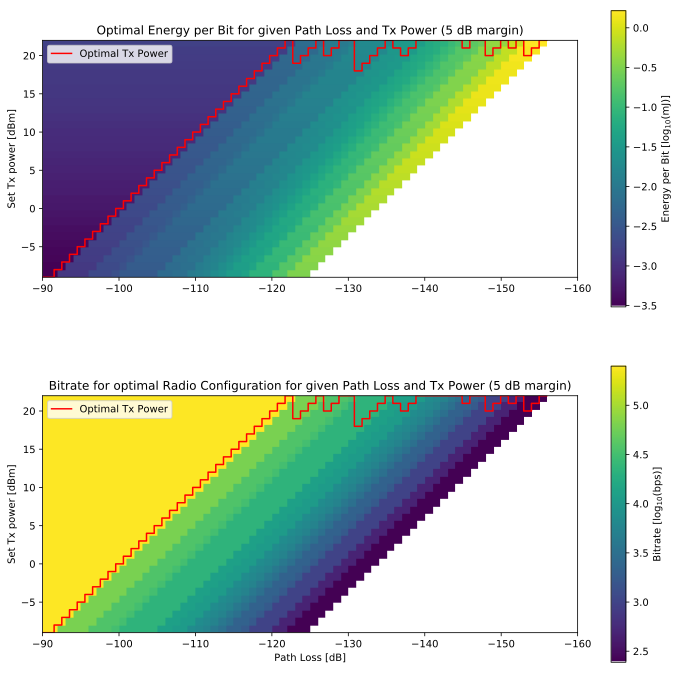

In [19]:
plt.figure(figsize=[12,12])

plt.subplot(211)
ax = plt.gca()

im = ax.imshow(energy_map, extent=[PATH_LOSSES[0], PATH_LOSSES[-1], POWERS[0], POWERS[-1]])
plt.step(PATH_LOSSES, optimal_tx_power, 'r', label="Optimal Tx Power")

cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel(r"Energy per Bit [$\log_{10}(\mathrm{mJ})$]", va="top")

plt.title("Optimal Energy per Bit for given Path Loss and Tx Power (5 dB margin)")
plt.ylabel("Set Tx power [dBm]")
plt.legend()

plt.subplot(212)

ax = plt.gca()

im = ax.imshow(bitrate_map, extent=[PATH_LOSSES[0], PATH_LOSSES[-1], POWERS[0], POWERS[-1]])
plt.step(PATH_LOSSES, optimal_tx_power, 'r', label="Optimal Tx Power")

cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel(r"Bitrate [$\log_{10}(\mathrm{bps})$]", va="top")

plt.title("Bitrate for optimal Radio Configuration for given Path Loss and Tx Power (5 dB margin)")
plt.ylabel("Set Tx power [dBm]")
plt.xlabel("Path Loss [dB]")
plt.legend()
plt.show()